In [1]:
from common import *
from matplotlib.ticker import MultipleLocator
%matplotlib inline

In [2]:
# Constant Cp from Pierrehumbert (2010)
# Units of J mol-1
cp_rtp = {
    "H2O": 1847.0 * 0.018,
    "CO2": 820.0  * 0.044 ,
    "CH4": 2195.0 * 0.016 ,
    "N2": 1037.0  * 0.028
}

In [3]:
def shomate(t:float, gas:str):

    match gas:
        case "H2O":
            if t < 1700:
                A= 30.09200	
                B= 6.832514	
                C= 6.793435	
                D= -2.534480
                E= 0.082139	
            else:
                A= 41.96426
                B= 8.622053
                C= -1.499780
                D= 0.098119
                E= -11.15764

        case "CH4":
            if t < 1300:
                A= 	-0.703029	
                B= 	108.4773	
                C= 	-42.52157	
                D= 	5.862788	
                E= 	0.678565	
            else:
                A= 	85.81217
                B= 	11.26467
                C= 	-2.114146
                D= 	0.138190
                E= 	-26.42221
        
        case _:
            raise Exception("Invalid gas %s"%gas)

    t = t / 1000.0
    t2 = t*t
    t3 = t2 * t 
    out = A + B*t + C*t2 + D*t3 + E/t2

    return out

In [4]:
def compare(g, leg=True, ylabel=True):

    janaf = np.loadtxt("cp/dat/%s.csv"%g, delimiter=',').T
    jan_t = janaf[0]
    jan_c = janaf[1]

    fig,ax = plt.subplots(1,1, figsize=(4,3))

    sho_c = [shomate(t, g) for t in jan_t]

    if g in cp_rtp.keys():
        ax.axhline(y=cp_rtp[g], label="Constant",c='k',ls='dotted')
    ax.plot(jan_t, jan_c, label="JANAF", c='tab:orange')
    ax.plot(jan_t, sho_c, label="Shomate", ls='dashed', c="k")

    ax.set_ylim(0, np.amax(jan_c)*1.1)
    ax.set_xlim(0, 2000)

    if ylabel:
        ax.set_ylabel(r"Molar heat capacity [J K$^{-1}$ mol$^{-1}$]")
    ax.set_xlabel("Temperature [K]")

    if leg:
        ax.legend(loc='lower right')

    ax.xaxis.set_minor_locator(MultipleLocator(100))
    ax.yaxis.set_minor_locator(MultipleLocator(10))

    ax.set_title(pretty_name(g))

    fig.savefig("nogit/cp_compare_%s.pdf"%g,bbox_inches='tight')
    plt.show()

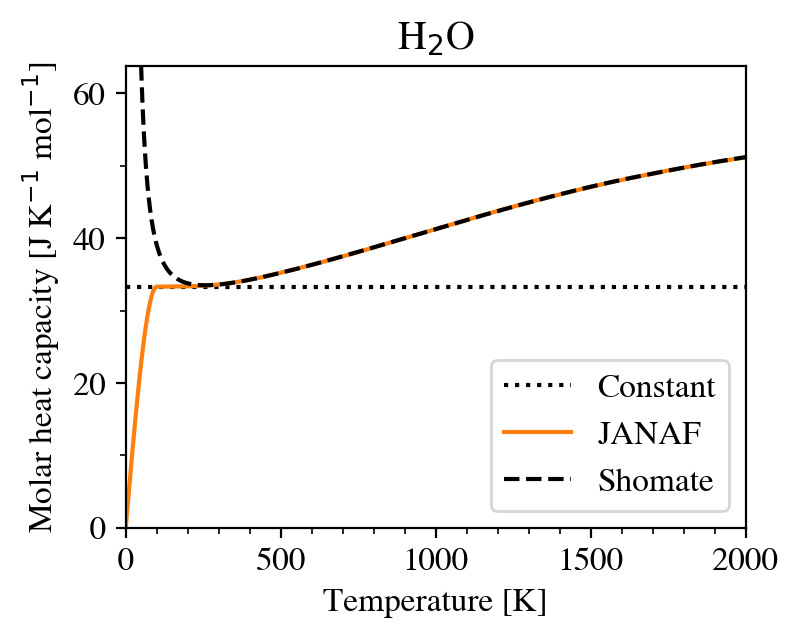

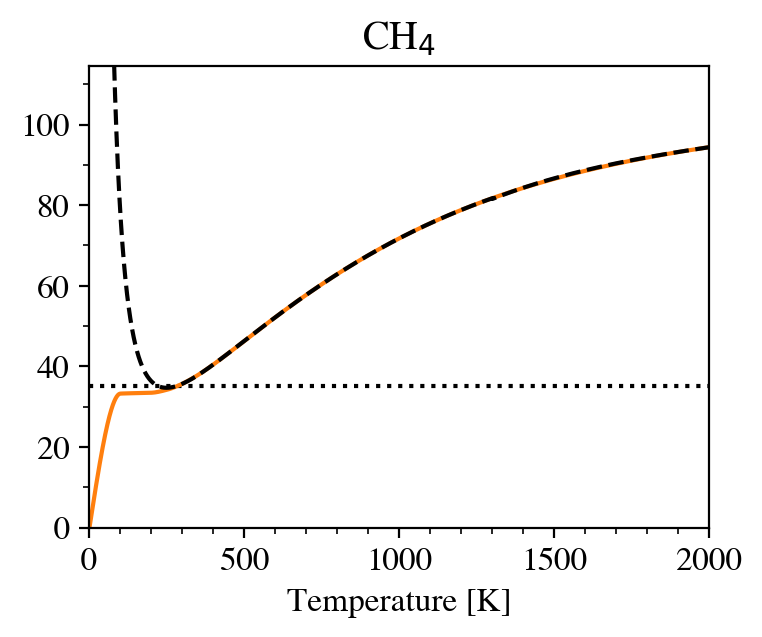

In [5]:
plt.close("all")
compare("H2O")
compare("CH4", leg=False, ylabel=False)